In [1]:
import re
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import missingno as mno
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df =  pd.read_csv('Data/data.csv')

In [3]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 1        0
Unnamed: 2        0
Unnamed: 3        0
Unnamed: 4      348
Unnamed: 5     1206
Unnamed: 6     1986
Unnamed: 7     2652
Unnamed: 8     2976
Unnamed: 9     3228
Unnamed: 10    3408
Unnamed: 11    3726
Unnamed: 12    4176
Unnamed: 13    4416
Unnamed: 14    4614
Unnamed: 15    4680
Unnamed: 16    4728
Unnamed: 17    4848
dtype: int64

<Axes: >

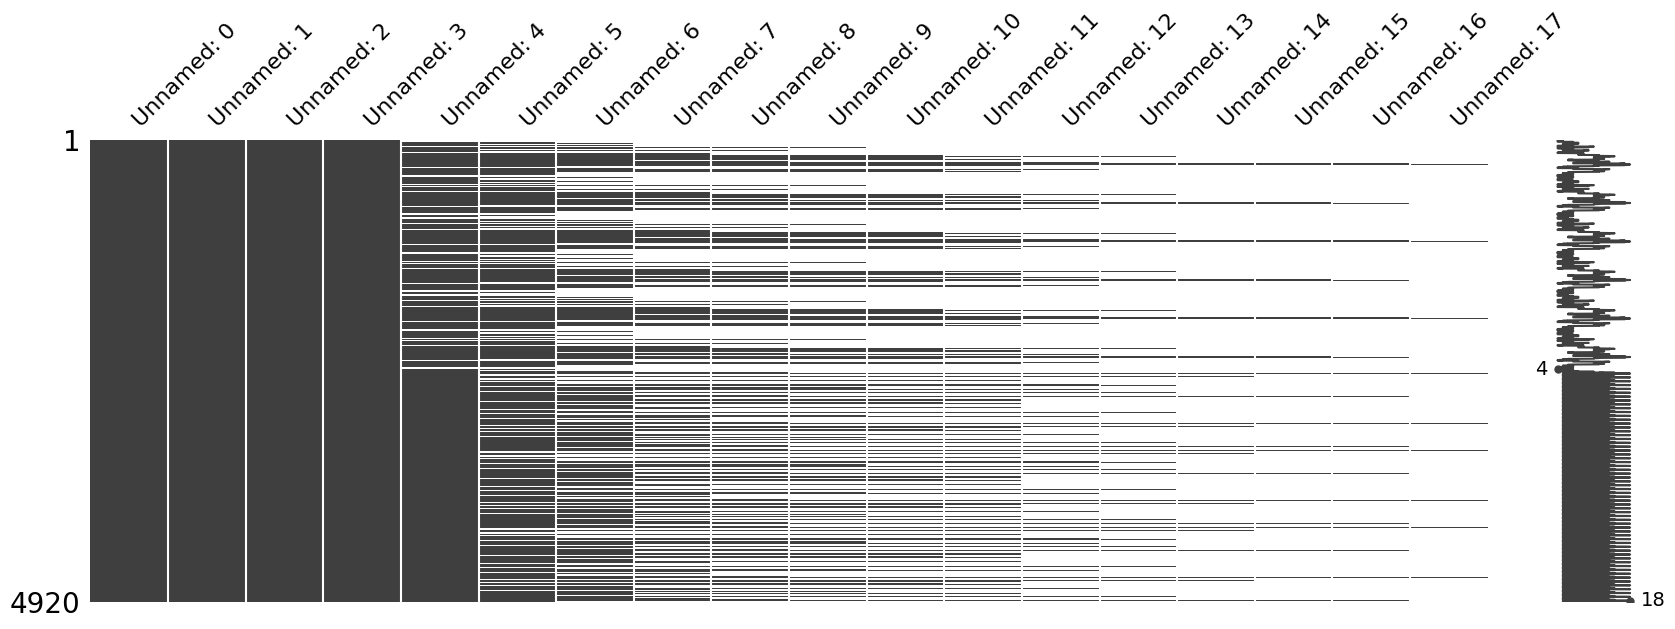

In [4]:
mno.matrix(df, figsize = (20, 6))

In [5]:
data= pd.read_csv('Data/dataset.csv')
data.dataframeName = 'Testing.csv'
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

<Axes: >

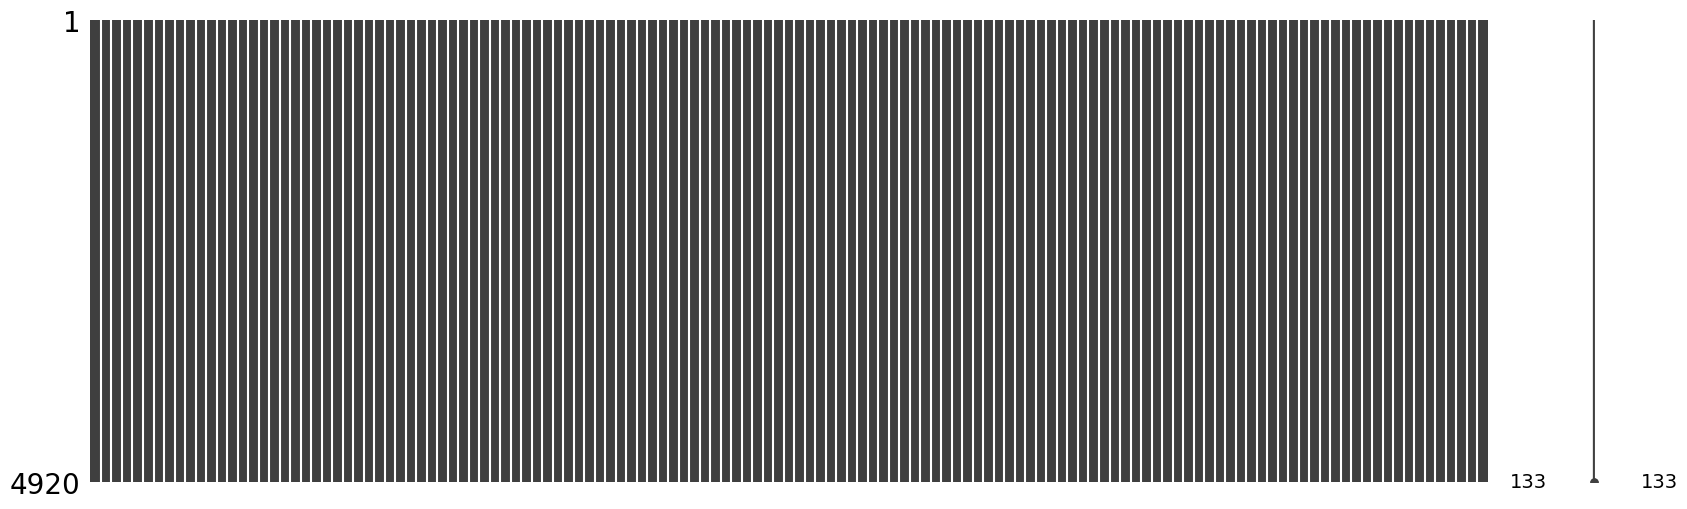

In [7]:
mno.matrix(data, figsize = (20, 6))

In [8]:
cols= data.columns
cols= cols[:-1]
x = data[cols]
y = data['prognosis']
y1= y
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [9]:
disease = [i for i in data['prognosis']]
disease_count = {disease[i] : disease.count(disease[i]) for i in range(len(disease))}
disease_count

{'Fungal infection': 120,
 'Allergy': 120,
 'GERD': 120,
 'Chronic cholestasis': 120,
 'Drug Reaction': 120,
 'Peptic ulcer diseae': 120,
 'AIDS': 120,
 'Diabetes ': 120,
 'Gastroenteritis': 120,
 'Bronchial Asthma': 120,
 'Hypertension ': 120,
 'Migraine': 120,
 'Cervical spondylosis': 120,
 'Paralysis (brain hemorrhage)': 120,
 'Jaundice': 120,
 'Malaria': 120,
 'Chicken pox': 120,
 'Dengue': 120,
 'Typhoid': 120,
 'hepatitis A': 120,
 'Hepatitis B': 120,
 'Hepatitis C': 120,
 'Hepatitis D': 120,
 'Hepatitis E': 120,
 'Alcoholic hepatitis': 120,
 'Tuberculosis': 120,
 'Common Cold': 120,
 'Pneumonia': 120,
 'Dimorphic hemmorhoids(piles)': 120,
 'Heart attack': 120,
 'Varicose veins': 120,
 'Hypothyroidism': 120,
 'Hyperthyroidism': 120,
 'Hypoglycemia': 120,
 'Osteoarthristis': 120,
 'Arthritis': 120,
 '(vertigo) Paroymsal  Positional Vertigo': 120,
 'Acne': 120,
 'Urinary tract infection': 120,
 'Psoriasis': 120,
 'Impetigo': 120}

<function matplotlib.pyplot.show(close=None, block=None)>

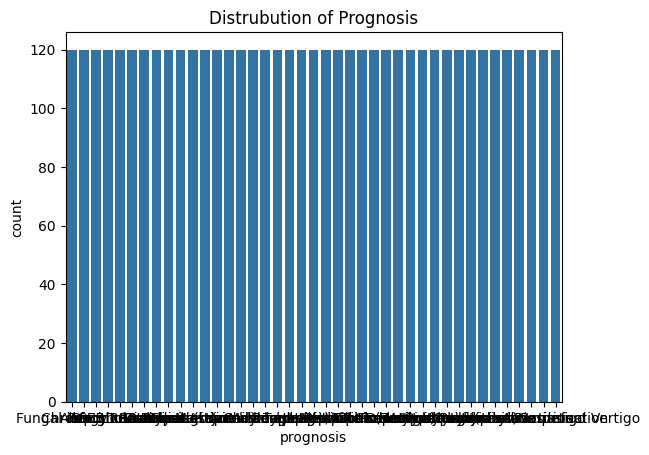

In [10]:
sns.countplot(x='prognosis',data=data)
plt.title('Distrubution of Prognosis')
plt.show

In [11]:
reduced_data = data.groupby(data['prognosis']).max()

In [12]:
#mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
#Decision Tree Classifier
clf1  = DecisionTreeClassifier()

#Training our model
clf = clf1.fit(x_train,y_train)

print(clf.score(x_train,y_train))
print ("cross result========")
scores = cross_val_score(clf, x_test, y_test, cv=3)
print (scores)

print (scores.mean())


1.0
cross result========
[0.97232472 0.97781885 0.974122  ]
0.9747551911748323


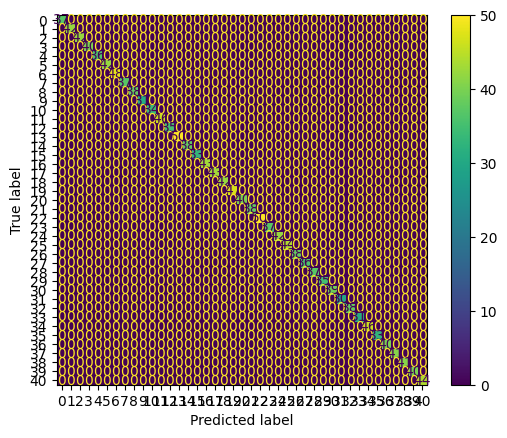

In [15]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

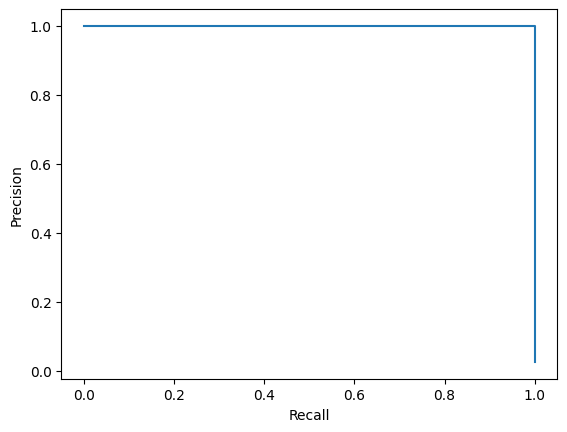

In [16]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
y_score = clf.predict_proba(x_test)[:, 1]
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [17]:
model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
print(model.score(x_test,y_test))
print ("cross result========")
scores = cross_val_score(model, x_test, y_test, cv=3)
print (scores)

print (scores.mean())


for svm: 
1.0
cross result========
[1. 1. 1.]
1.0


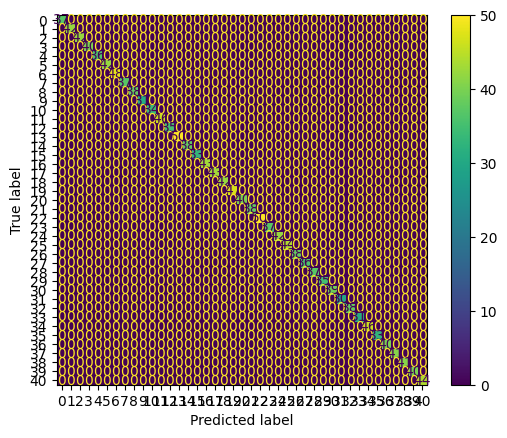

In [18]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [19]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

In [20]:
severity_data = pd.read_csv("MasterData/symptom_severity.csv")

In [21]:
severity_data.columns = ['symptom','severity']
severity_data

,symptom,severity
0,skin_rash,3
1,nodal_skin_eruptions,4
2,continuous_sneezing,4
3,shivering,5
4,chills,3
...,...,...
126,small_dents_in_nails,2
127,inflammatory_nails,2
128,blister,4
129,red_sore_around_nose,2


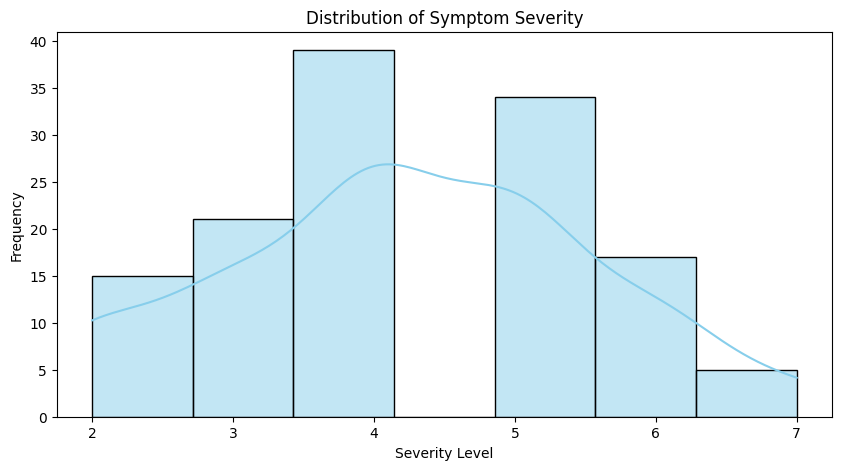

In [22]:
# Visualization of Symptom Severity Distribution
plt.figure(figsize=(10, 5))
sns.histplot(severity_data['severity'], bins=7, kde=True, color='skyblue')
plt.title('Distribution of Symptom Severity')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.show()

In [23]:
symptom_description = pd.read_csv("MasterData/symptom_Description.csv")

In [24]:
symptom_description.columns = ['symptom','description']

C:\Users\amira\AppData\Local\Temp\ipykernel_11100\45076426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='symptom', data=symptom_description, palette='pastel')


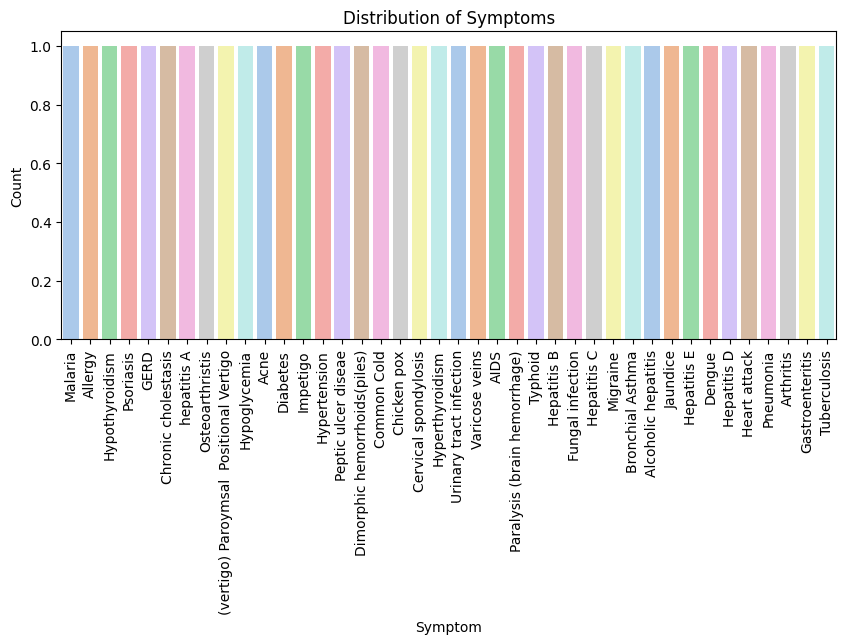

In [25]:
# Visualization of Symptoms Distribution
# Assuming 'symptom_Description.csv' is loaded into a DataFrame named 'symptom_description'
plt.figure(figsize=(10, 4))
sns.countplot(x='symptom', data=symptom_description, palette='pastel')
plt.title('Distribution of Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

[Text(0.9738562091503268, 0.9912280701754386, 'x[55] <= 0.5\ngini = 0.976\nsamples = 3296\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 86, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 89, 74, 87\n80, 79, 79, 80, 76]'),
 Text(0.9607843137254902, 0.9736842105263158, 'x[93] <= 0.5\ngini = 0.975\nsamples = 3210\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 89, 74, 87\n80, 79, 79, 80, 76]'),
 Text(0.9477124183006536, 0.956140350877193, 'x[79] <= 0.5\ngini = 0.974\nsamples = 3124\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 82, 84, 83, 85, 81, 90, 82, 3, 74, 87\n80, 79, 79, 80, 76]'),
 Text(0.934640522875817, 0.9385964912280702, 'x[105] <= 0.5\ngini = 0.974\nsamples = 3038\nvalue = [83, 78, 78, 80, 84, 78, 72, 83, 82, 89, 0, 74\n85, 70, 82, 87, 77, 77, 78, 73, 80, 82, 70, 83\n78, 76, 

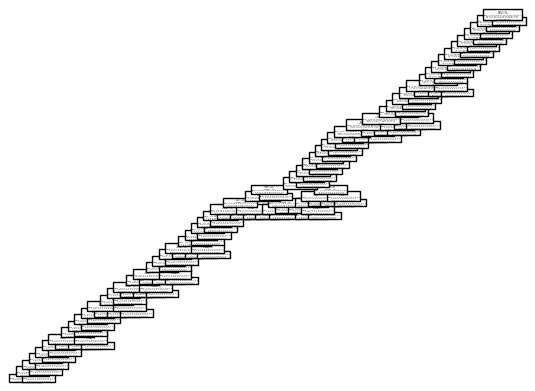

In [26]:
#relations between features
tree.plot_tree(clf) 

In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf) 
graph = graphviz.Source(dot_data) 
graph.render("chatbot") 

'chatbot.pdf'

In [28]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [29]:
def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()

In [30]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()
symptoms_dict = {}
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

In [31]:
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")

In [32]:
def getDescription():
    global description_list
    with open('MasterData/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [33]:
def getSeverityDict():
    global severityDictionary
    with open('MasterData/symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass

In [34]:
def getprecautionDict():
    global precautionDictionary
    with open('MasterData/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [35]:
def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

In [36]:
def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]

In [37]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Data/dataset.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])


In [38]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

In [39]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:
        strn = "Enter the symptom you are experiencing (if you can't explain just press Enter and choice)"
        readn(strn)
        print("\n",strn," \t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}) if you have more then 1 symptom choice the The most influential :  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? (yes or no) : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))

    recurse(0, 1)

In [40]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")

-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->Hello,  Paul

 Enter the symptom you are experiencing (if you can't explain just press Enter and choice)  		->searches related to input: 
0 ) itching
1 ) skin_rash
2 ) nodal_skin_eruptions
3 ) continuous_sneezing
4 ) shivering
5 ) chills
6 ) joint_pain
7 ) stomach_pain
8 ) acidity
9 ) ulcers_on_tongue
10 ) muscle_wasting
11 ) vomiting
12 ) burning_micturition
13 ) spotting_ urination
14 ) fatigue
15 ) weight_gain
16 ) anxiety
17 ) cold_hands_and_feets
18 ) mood_swings
19 ) weight_loss
20 ) restlessness
21 ) lethargy
22 ) patches_in_throat
23 ) irregular_sugar_level
24 ) cough
25 ) high_fever
26 ) sunken_eyes
27 ) breathlessness
28 ) sweating
29 ) dehydration
30 ) indigestion
31 ) headache
32 ) yellowish_skin
33 ) dark_urine
34 ) nausea
35 ) loss_of_appetite
36 ) pain_behind_the_eyes
37 ) back_pain
38 ) constipation
39 ) abdominal_pain
40 ) diarrhoea
41 ) mild_fever
42 ) yellow_uri

c:\Users\amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
